# Import necessory libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Loading the data

In [3]:
sales_data = pd.read_csv('Advertising.csv',index_col='Unnamed: 0')

In [4]:
sales_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# EDA

In [5]:
sales_data.shape

(200, 4)

In [6]:
# check if any null value in data
sales_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
# check for duplicate values in dataset
sales_data.duplicated().sum()

0

In [9]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


# Now visualize the Data

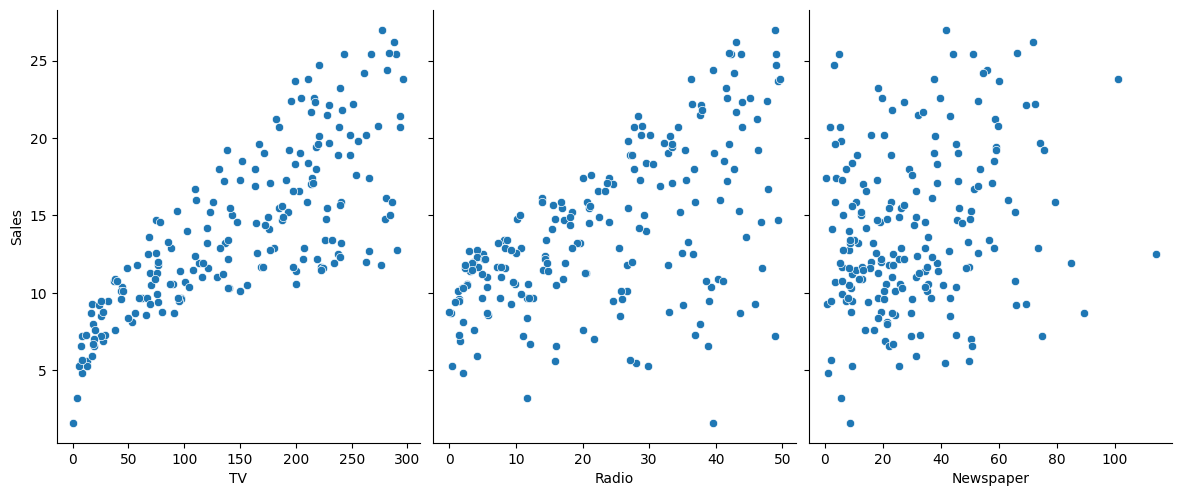

In [10]:
sns.pairplot(sales_data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.8)
plt.show()

# Check correlation between data

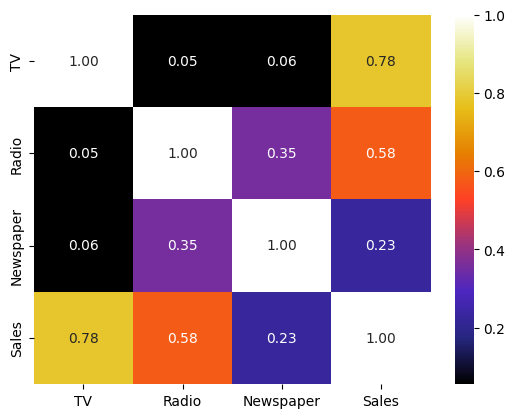

In [11]:
#Correlation matrix
corr_matrix = sales_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='CMRmap', fmt='.2f')
plt.show()

In [12]:
corr_matrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


# Now train the model

* split the dataset

In [13]:
X = sales_data[['TV', 'Radio', 'Newspaper']]
y = sales_data['Sales']

In [14]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

* Choose and train the model

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train,y_train)

LinearRegression()

make prediction

In [17]:
# Make predictions on the training set
train_predictions = model.predict(X_train)

In [18]:
# Make predictions on the testing set
test_predictions = model.predict(X_test)

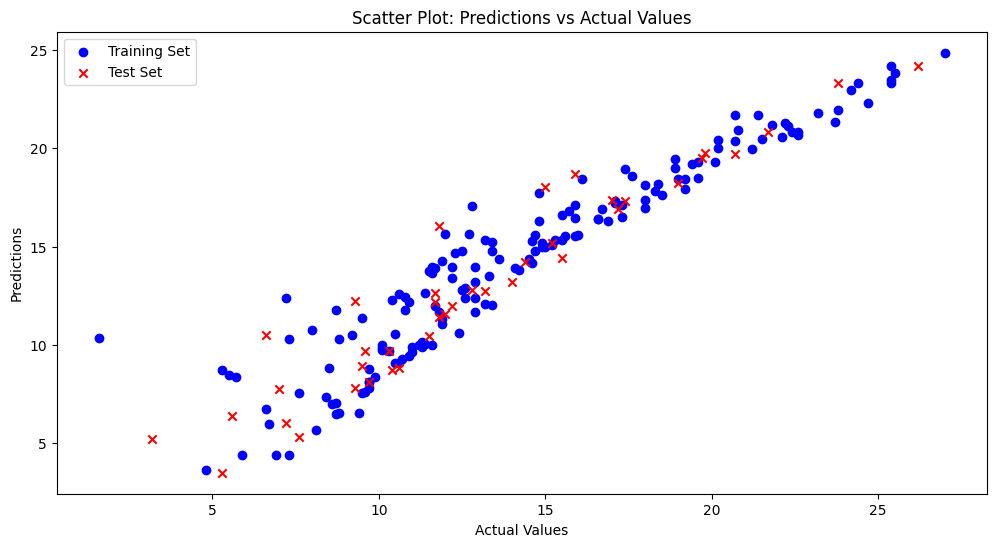

In [19]:
# Scatter plot for both training and test set predictions
plt.figure(figsize=(12, 6))
plt.scatter(y_train, train_predictions, c='blue', label='Training Set', marker='o')
plt.scatter(y_test, test_predictions, c='red', label='Test Set', marker='x')
plt.title('Scatter Plot: Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

* Model evalution

In [20]:
print(f''' The train accuracy : {r2_score(y_train,train_predictions)} 
The test accuracy : {r2_score(y_test , test_predictions)}''')

 The train accuracy : 0.8929164670647455 
The test accuracy : 0.9095550600904052


Train model using random forest regression

In [21]:
rf = RandomForestRegressor()

In [23]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [24]:
train_predict = rf.predict(X_train)
test_predict = rf.predict(X_test)

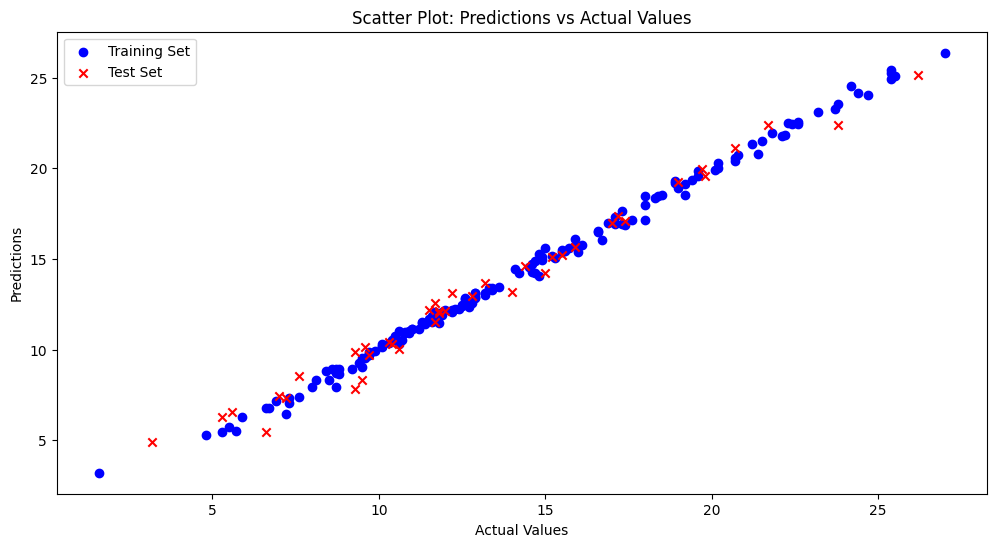

In [25]:
# Scatter plot for both training and test set predictions
plt.figure(figsize=(12, 6))
plt.scatter(y_train, train_predict, c='blue', label='Training Set', marker='o')
plt.scatter(y_test, test_predict, c='red', label='Test Set', marker='x')
plt.title('Scatter Plot: Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

In [26]:
print(f''' The train accuracy : {r2_score(y_train,train_predict)} 
The test accuracy : {r2_score(y_test , test_predict)}''')

 The train accuracy : 0.9965556649859927 
The test accuracy : 0.9814243788374684
